In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [2]:
# Define the file paths
train_csv = 'data/train.csv'
test_csv = 'data/test.csv'
sample_submission_csv = 'data/sample_submission.csv'

# Load the training data
train_data = pd.read_csv(train_csv)

# Load the test data
test_data = pd.read_csv(test_csv)

# Load the sample submission data (if needed)
sample_submission = pd.read_csv(sample_submission_csv)

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


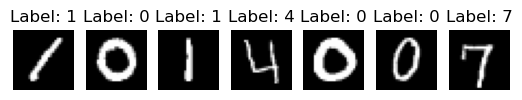

In [4]:
# Extract labels and pixel values from the DataFrame
labels = train_data['label']
pixels = train_data.drop('label', axis=1)

# Display the first few images and their labels
num_images_to_display = 7

for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    image = np.array(pixels.iloc[i]).reshape(28, 28)  # Reshape the 1D array to 28x28
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {labels.iloc[i]}")
    plt.axis('off')

plt.show()

In [5]:
# Define the model
model = models.Sequential()

# Input layer (784 + 1 perceptrons)
model.add(layers.Dense(units=785, activation='relu', input_shape=(784,)))

# Hidden layers (you can choose the number and size of these layers)
model.add(layers.Dense(units=256, activation='relu'))  # Example hidden layer
model.add(layers.Dense(units=128, activation='relu'))  # Example hidden layer
model.add(layers.Dense(units=64, activation='relu'))   # Example hidden layer

# Output layer with sigmoid activation (10 units for digits)
model.add(layers.Dense(units=10, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 785)               616225    
                                                                 
 dense_1 (Dense)             (None, 256)               201216    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 859243 (3.28 MB)
Trainable params: 859243 (3.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Split the dataset into training (80%) and validation (20%) sets
X = train_data.drop('label', axis=1)
y = train_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1050/1050 [==============================] - 11s 10ms/step - loss: 1.0034 - accuracy: 0.8830
Epoch 2/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0.2141 - accuracy: 0.9413
Epoch 3/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0.1602 - accuracy: 0.9554
Epoch 4/10
1050/1050 [==============================] - 12s 12ms/step - loss: 0.1409 - accuracy: 0.9588
Epoch 5/10
1050/1050 [==============================] - 12s 12ms/step - loss: 0.1238 - accuracy: 0.9654
Epoch 6/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0.1120 - accuracy: 0.9691
Epoch 7/10
1050/1050 [==============================] - 12s 11ms/step - loss: 0.1077 - accuracy: 0.9698
Epoch 8/10
1050/1050 [==============================] - 11s 11ms/step - loss: 0.0834 - accuracy: 0.9757
Epoch 9/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0.0843 - accuracy: 0.9771
Epoch 10/10
1050/1050 [==============================] - 13s 12m

In [7]:
# Predict the labels for the test data
y_test_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
y_test_pred_labels = np.argmax(y_test_pred, axis=1)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_test_pred_labels, squared=False)

# Calculate R2 score
r2 = r2_score(y_test, y_test_pred_labels)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred_labels)

print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'Accuracy: {accuracy * 100:.2f}%')

263/263 [==============================] - 1s 3ms/step
RMSE: 0.8994707438530833
R2: 0.9028758785751058
Accuracy: 94.29%
